In [1]:
import pandas as pd
import pytrends
from pytrends.request import TrendReq
import yfinance as yf
from pytrends import dailydata

# Import plotting library
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Import numpy
import numpy as np

In [2]:
from pytrends.request import TrendReq
from pytrends import dailydata

df = dailydata.get_weekly_data('cinema', 2019, 1, 2019, 10, geo = 'BR')

df

cinema:2019-01-01 2019-01-31
cinema:2019-02-01 2019-02-28
cinema:2019-03-01 2019-03-31
cinema:2019-04-01 2019-04-30
cinema:2019-05-01 2019-05-31
cinema:2019-06-01 2019-06-30
cinema:2019-07-01 2019-07-31
cinema:2019-08-01 2019-08-31
cinema:2019-09-01 2019-09-30
cinema:2019-10-01 2019-10-31


,cinema_unscaled,cinema_monthly,isPartial,scale,cinema
date,,,,,
2019-01-01,66,NaN,NaN,NaN,NaN
2019-01-02,78,NaN,NaN,NaN,NaN
2019-01-03,78,NaN,NaN,NaN,NaN
2019-01-04,75,NaN,NaN,NaN,NaN
2019-01-05,98,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-10-27,72,37.0,False,0.37,26.64
2019-10-28,55,37.0,NaN,0.37,20.35
2019-10-29,40,37.0,NaN,0.37,14.80


In [2]:
pt = TrendReq()

# Set the search term we want to investigate, you can pass more than # one so we set in a list
kw_list = ["cryptocurrency"]

# Set the timeframe we want to request
#pt.build_payload(kw_list, timeframe='2010-01-01 2021-05-19')

df = dailydata.get_daily_data(kw_list, 2020, 1, 2020, 10)

#df = pt.interest_over_time()
# Review the dataframe
df

The request failed: Google returned a response with code 400.
Trying again in 60 seconds.


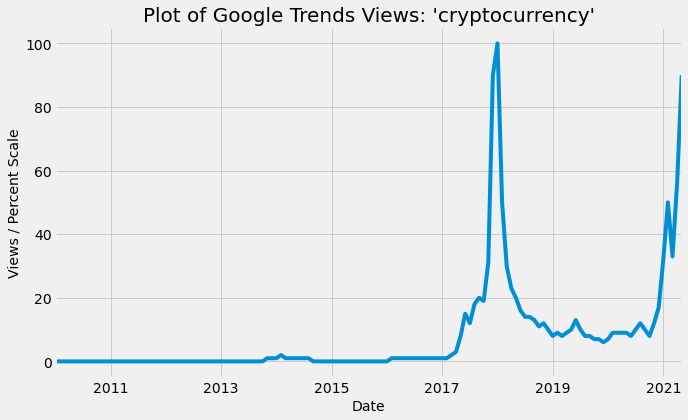

In [3]:
# Plot the trend data
plt.figure(figsize=(10,6))
df["cryptocurrency"].plot(lw=4)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Views / Percent Scale", fontsize=14)
plt.title("Plot of Google Trends Views: 'cryptocurrency'", fontsize=20);

In [11]:
import yfinance as yf

btc = yf.download("BTC-USD", start="2010-01-01", end="2021-05-19")
btc.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [20]:

import numpy as np
from pandas_datareader import data

total=btc.copy()
total = total.reset_index()

# Change UNIX times to datetime format
#total.Date = pd.to_datetime(total.Date, unit='s')

# Review df
total.head()

# Import scaling library from sklearn
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
mm = MinMaxScaler()

# Reshape and fit_transform the price feature
scaled = mm.fit_transform(total["High"].values.reshape(-1, 1))
# MinMax scales between 0-1, but we want a percentage 0-100%
scaled = scaled*100

# Now create the scaled feature in our dataframe, round the values
total["scaled_high"] = scaled
total["scaled_high"] = round(total["scaled_high"],1)

# Create a high price feature that gives price in $Billions USD
# this removes the ugly hard to ready scientific notation
total["high_bils"] = round(total["High"]/1e+9)
# Review new dataset
total.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,scaled_high,high_bils
2431,2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,49880.535156,55737497453,79.2,0.0
2432,2021-05-15,49855.496094,50639.664062,46664.140625,46760.187500,46760.187500,59161047474,78.0,0.0
2433,2021-05-16,46716.636719,49720.042969,43963.351562,46456.058594,46456.058594,64047871555,76.6,0.0
2434,2021-05-17,46415.898438,46623.558594,42207.289062,43537.511719,43537.511719,74903638450,71.8,0.0
2435,2021-05-18,43488.058594,45812.457031,42367.832031,42909.402344,42909.402344,56187365084,70.5,0.0


AttributeError: 'DataFrame' object has no attribute 'high_bil'

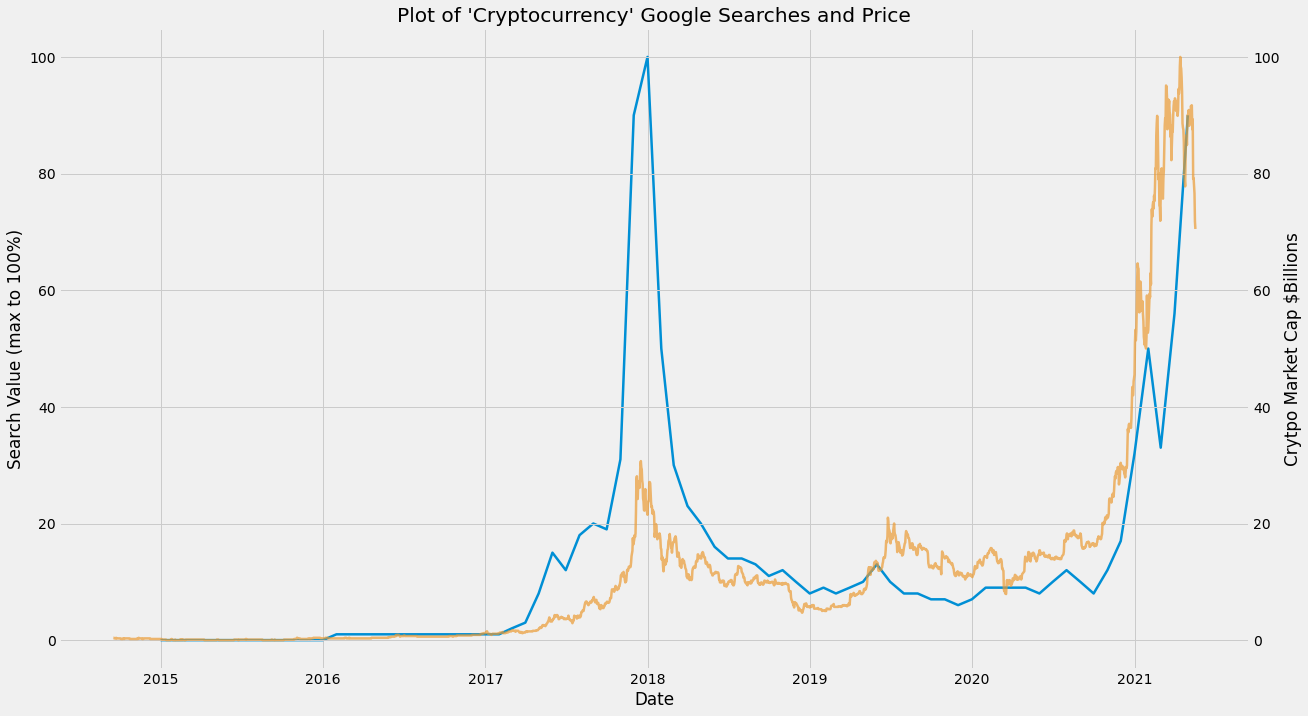

In [21]:
# Slice the search data so it starts around the same time as mktcap
df1 = df.iloc[60:]
# Import ticker formatters
import matplotlib.ticker as ticker
from matplotlib.ticker import FixedFormatter, FixedLocator

# Create axes and plot values
fig, ax = plt.subplots(figsize=(19,11))
ax.set_title("Plot of 'Cryptocurrency' Google Searches and Price")
ax.set_xlabel("Date")
ax.set_ylabel("Search Value (max to 100%)")
ax.plot(df1.index, df1["cryptocurrency"], alpha=1, lw=2.5, label="search magnitude")
ax1 = ax.twinx()
ax1.plot(total["Date"], total["scaled_high"], "#eb9b34", lw=2.5, label="price", alpha=0.7)
ax1.set_ylabel("Crytpo Market Cap $Billions")

# Format the market cap yticks so linear prices are displayed
price_list = [10, 100, 500, 1000, 1800, 2500] # list of spaced out prices
# set empty lists for ticker formatting
format_list = [] 
location_list = [] 

# Iterate through the price list and populate the lists
for i, j in enumerate(price_list):
    x = j*0.85 # create a range for our query
    queried_data = total[(total.high_bil<j) & (total.high_bil>x)].sample(n=1)
    format_val = queried_data.iloc[0].high_bil
    locate_val = queried_data.iloc[0].scaled_high
    format_list.append(format_val)
    location_list.append(locate_val)
    
# Create a list of strings for the high prices 
high_list = format_list
string_ints = [str(int) for int in high_list]
#Use the string list and use locator/formatter to rewrite the y ticks
y_formatter = FixedFormatter(string_ints)
y_locator = FixedLocator(location_list)
ax1.yaxis.set_major_formatter(y_formatter)
ax1.yaxis.set_major_locator(y_locator)

# Locate the legend
fig.legend(bbox_to_anchor=(0.2, 0.85))
plt.show()